In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
sns.set(color_codes=True)
sns.set(font_scale=1)
sns.set_style("white")
df = pd.read_csv(r'~/Documents/QualComp.csv')

dfInd = pd.read_csv(r'~/Documents/QualCompInd.csv')

dfChain = pd.read_csv(r'~/Documents/Transmission.csv')

df['transmission'].values
dfInd

,Serotype,k,K,delta,b,I0,r,P0,maxViral,TimeMax,cumViral,infectTime,latentPeriod,infectPeriod
0,SAT1,0.117158,6.589546,1.807982,0.313187,2.562190,3.347244,0.008225,6.549078,3.840891,30.257871,2.569851,0.368900,6.332239
1,SAT1,0.107542,6.006995,1.764985,0.356556,2.699494,3.297285,0.006591,5.965152,3.889370,26.516018,2.527281,0.402867,6.301645
2,SAT1,0.109165,6.009498,1.866977,0.359393,2.692518,3.905794,0.009711,5.978585,3.351425,26.436968,2.538672,0.390109,6.295969
3,SAT1,0.123458,8.609496,1.945038,0.291718,2.532585,3.374294,0.009476,8.530601,3.677989,32.630266,2.542830,0.383250,6.296396
4,SAT2,0.173626,4.079835,2.891305,0.932998,2.476444,3.530215,0.005961,3.977097,3.113392,9.990675,2.546257,0.630233,3.871151
5,SAT2,0.148467,7.894728,1.830062,0.450313,2.296022,1.818514,0.014795,7.185663,5.131993,21.327919,3.448930,1.402238,4.549518
6,SAT2,0.153096,6.146920,2.514426,0.615203,2.156441,1.637601,0.009133,5.349490,5.551781,15.315014,3.447841,1.401146,4.530588
7,SAT2,0.146364,4.603728,2.890721,0.894831,2.646083,1.935262,0.010113,4.078179,4.536365,10.145853,3.300110,1.216309,2.815905
8,SAT3,0.051370,8.889692,1.470019,0.289278,2.699089,1.078663,0.018667,7.764017,7.970132,31.851635,3.935859,3.158874,4.957697
9,SAT3,0.105849,9.950749,2.492447,0.605915,3.173148,1.511407,0.007643,7.276610,5.678341,15.246346,3.161101,1.856565,4.301712


In [82]:
dfSAT3 = dfInd.loc[dfInd['Serotype'] == 'SAT3']
dfSAT2 = dfInd.loc[dfInd['Serotype'] == 'SAT2']
dfSAT1 = dfInd.loc[dfInd['Serotype'] == 'SAT1']

S1sub = 3.182*np.std(dfSAT1['r'])/np.sqrt(4)
S2sub = 3.182*np.std(dfSAT2['r'])/np.sqrt(4)
S3sub = 4.303*np.std(dfSAT3['r'])/np.sqrt(3)

Ssub = np.array([S1sub,S2sub,S3sub])

means = np.array(df['r'])
ELB = means-Ssub
EUB = means+Ssub
print(ELB)
print(EUB)

[3.08862726 1.02456919 0.70619182]
[3.87368126 3.4362263  2.2428753 ]


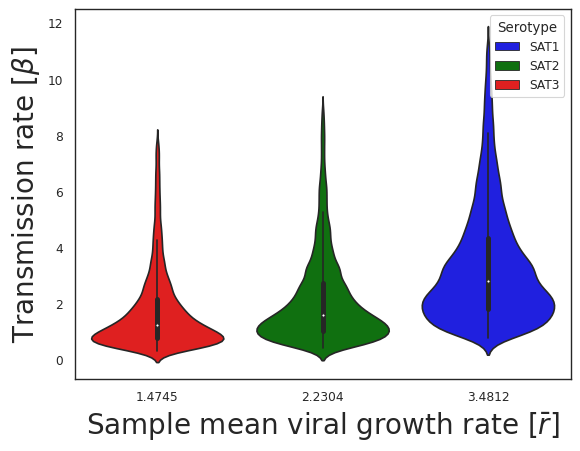

<Figure size 1100x2200 with 0 Axes>

In [70]:
dfChain.columns =['Serotype', 'Transm', 'meanGrow']
h = sns.violinplot(data=dfChain, x="meanGrow", y="Transm",hue="Serotype",palette=["blue","green","red"],order=np.flipud(dfChain['meanGrow'].unique()),dodge =False                )
#plt.xlim([0,1.05*max(df["lam"])])
#h.set_axis_labels('x', 'y', fontsize=16)

# or set labels via the axes objects
h.set_xlabel( r"Sample mean viral growth rate [$\bar{r}$]" , size = 20 ) 
h.set_ylabel( r"Transmission rate [$\beta$]" , size = 20 ) 
#h.set_title( r"Mean Adaptive Response Clearence Rate" , size = 16 ) 
#h.ax_joint.set_xlabel('$Lambda$')
#h.ax_joint.set_ylabel('k')
#hh =plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#hh.remove()
#h.set(ylim=(0, 15))
# sns.lineplot([0, 2],[1.8338467350426855,3.517935376191542],color='darkgray',linewidth=3)
# s='β = f(r)';
# plt.text(1.15, 3.3, s, fontsize=16)
# plt.text(-.5, 11.5, '$R^2 = 0.98$',fontsize=16)
plt.figure(figsize=(11,22))
plt.show()


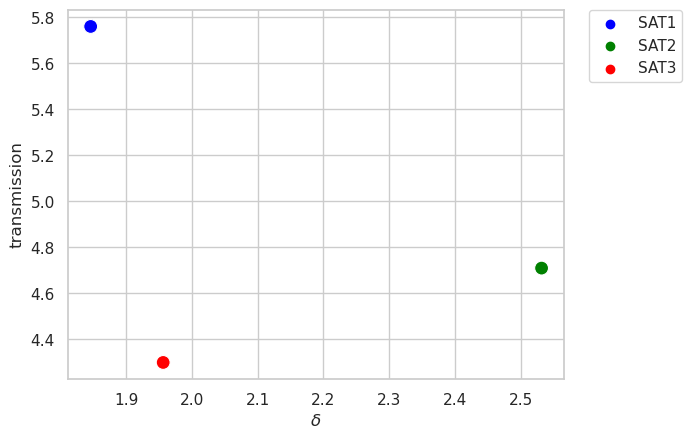

In [4]:
h = sns.scatterplot(data=df, x="delta", y="infect period",hue="ID",palette=['blue','green','red'],s=100)
plt.xlabel(r'$\delta$')
plt.ylabel(r'transmission')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Animal Husbandry')
plt.show()

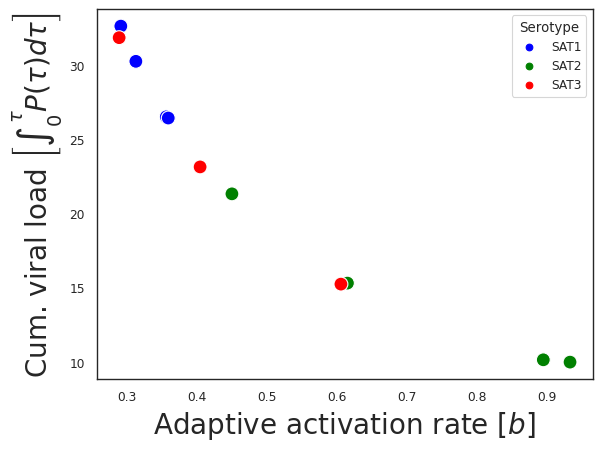

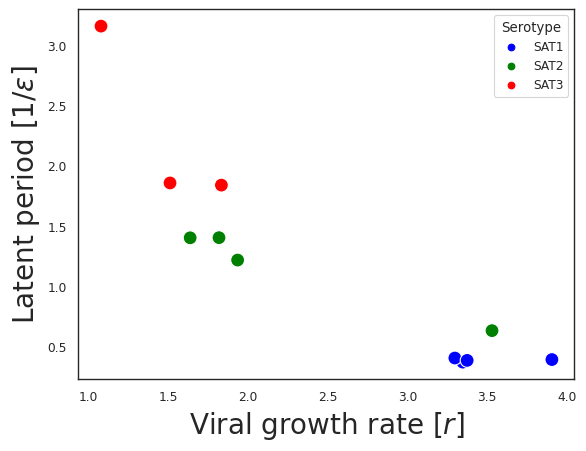

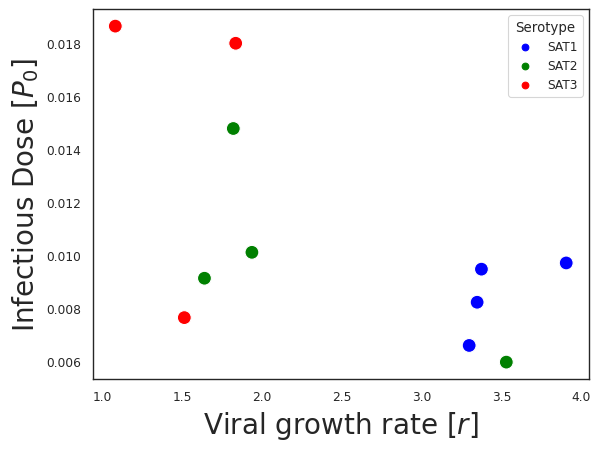

In [74]:
sns.set_context("paper", rc={"axes.labelsize":20})
h = sns.scatterplot(data=dfInd, y="cumViral", x="b",hue="Serotype",palette=['blue','green','red'],s=100)
plt.xlabel(r'Adaptive activation rate [$b$]')
plt.ylabel(r'Cum. viral load $\left[\int_{0}^\tau P(\tau) d\tau\right]$')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Animal Husbandry')
plt.show()

sns.set_context("paper", rc={"axes.labelsize":20})
h = sns.scatterplot(data=dfInd, y="latentPeriod", x="r",hue="Serotype",palette=['blue','green','red'],s=100)
plt.xlabel(r'Viral growth rate [$r$]')
plt.ylabel(r'Latent period [$1/\epsilon$]')
#plt.legend(fontisze=20)
#plt.title('Animal Husbandry')
plt.show()

sns.set_context("paper", rc={"axes.labelsize":20})
h = sns.scatterplot(data=dfInd, y="P0", x="r",hue="Serotype",palette=['blue','green','red'],s=100)
plt.xlabel(r'Viral growth rate [$r$]')
plt.ylabel(r'Infectious Dose [$P_0$]')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Animal Husbandry')
plt.show()

h = sns.scatterplot(data=dfInd, x="delta", y="infect period",hue="ID",palette=['blue','green','red'],s=100)
plt.xlabel(r'$\delta$')
plt.ylabel(r'transmission')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title('Animal Husbandry')
plt.show()

[0.83926605]


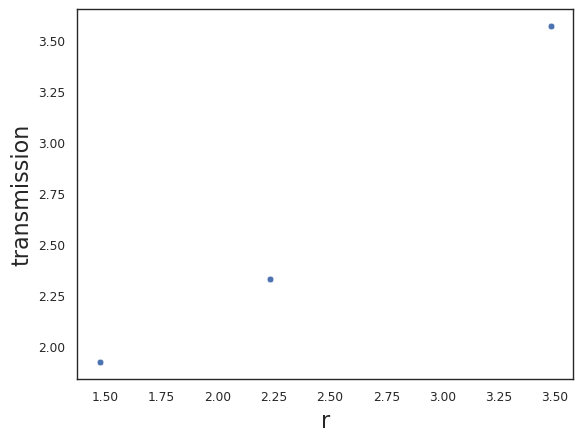

In [18]:
from sklearn.linear_model import LinearRegression

X = df['r'].values
y = df['transmission'].values
X = X.reshape(-1,1)
reg = LinearRegression().fit(X, y)

#print(reg.score(X, y))

print(reg.coef_)
#print(reg.intercept_)

xs = np.linspace(np.min(X),np.max(X),1000)
xs = xs.reshape(-1,1)
ys = reg.predict(xs)

h = sns.scatterplot(data=df, x = df['r'],y=df['transmission'])
#h.set(xscale="log")
#plt.title('logistic regression')
plt.show()
#dfAll['v19.Pre-Austronesian_population'].unique()
#print(ys[0])
#print(ys[999])

#r2_score(y, reg.predict(X))

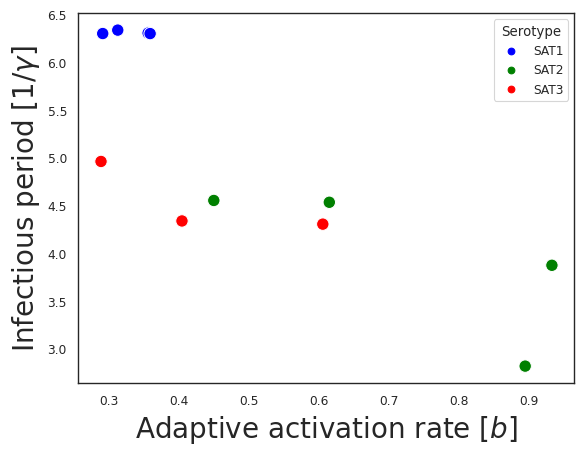

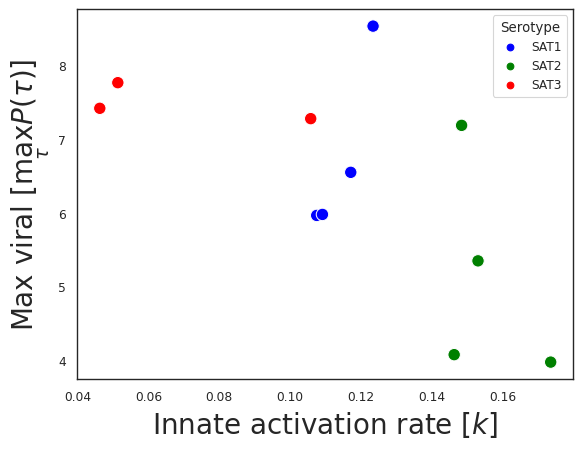

0.6695291872950206

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = dfInd['b'].values
X = X.reshape(-1,1)
y = dfInd['infectPeriod'].values
reg = LinearRegression().fit(X, y)
#plt.plot(xs, reg.predict(xs),color='black',linewidth=3)

sns.set_context("paper", rc={"axes.labelsize":20})
xs = np.linspace(np.min(dfInd['b']),np.max(dfInd['b']),20)
xs = xs.reshape(-1,1)
plt.xlabel(r'Adaptive activation rate [$b$]')
plt.ylabel(r'Infectious period [$1/\gamma$]')
#plt.plot(xs, reg.predict(xs),color='darkgray',linewidth=3)
s='1/γ = g(b)';
# plt.text(.5, 5.1, s, fontsize=16)
# plt.text(.65,6.0,'$R^2$= 0.67',fontsize=16)
h = sns.scatterplot(data=dfInd, x="b", y=dfInd["infectPeriod"],hue='Serotype',palette = ["blue", "green", "red"],s=80)
plt.show()

sns.set_context("paper", rc={"axes.labelsize":20})
xs = np.linspace(np.min(dfInd['k']),np.max(dfInd['b']),20)
xs = xs.reshape(-1,1)
plt.xlabel(r'Innate activation rate [$k$]')
plt.ylabel(r'Max viral [$\max_\tau P(\tau)$]')
#plt.plot(xs, reg.predict(xs),color='darkgray',linewidth=3)
s='1/γ = g(b)';
# plt.text(.5, 5.1, s, fontsize=16)
# plt.text(.65,6.0,'$R^2$= 0.67',fontsize=16)
h = sns.scatterplot(data=dfInd, x="k", y=dfInd["maxViral"],hue='Serotype',palette = ["blue", "green", "red"],s=80)
plt.show()

r2_score(y, reg.predict(X))

In [12]:


df

,ID,k,K,delta,b,I0,r,P0,maxViral,TimeMax,cumViral,transmission,latent period,infect period
0,SAT1,0.114331,6.803884,1.846246,0.330213,2.621697,3.481154,0.008500,6.755854,3.689919,28.960281,3.57,0.63,5.76
1,SAT2,0.155388,5.681303,2.531628,0.723336,2.393748,2.230398,0.010000,5.147607,4.583383,14.194865,2.33,1.38,4.71
2,SAT3,0.067833,8.927389,1.956448,0.433351,2.810342,1.474534,0.014776,7.485831,6.239015,23.413533,1.92,3.03,4.30


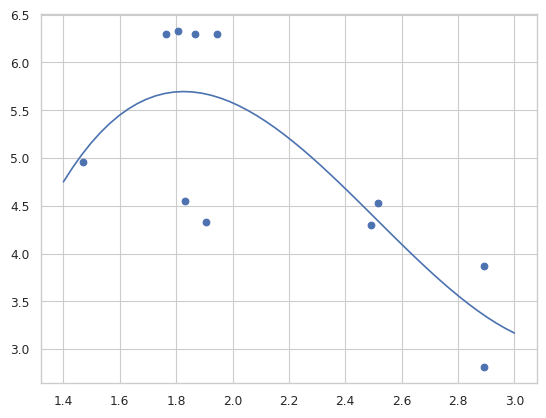

       3         2
2.093 x - 15.76 x + 36.64 x - 21.39


In [8]:

X = dfInd["delta"].values
#X = X.reshape(-1,1)
y = dfInd['infectPeriod'].values

#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(X, y, 3))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1.4, 3, 50)
plt.scatter(X, y)
plt.plot(polyline, model(polyline))
plt.show()

print(model)

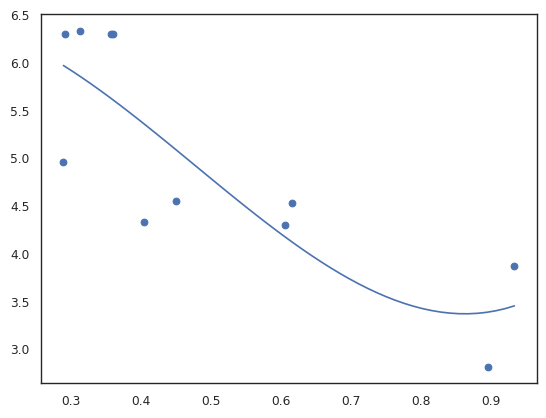

       3         2
13.58 x - 19.44 x + 3.229 x + 6.332


In [56]:
X = dfInd["b"].values
#X = X.reshape(-1,1)
y = dfInd['infectPeriod'].values

#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(X, y, 3))

#add fitted polynomial line to scatterplot
polyline = np.linspace(np.min(X), np.max(X), 50)
plt.scatter(X, y)
plt.plot(polyline, model(polyline))
plt.show()
print(model)

infectious period = fxn(viral clearence rate) - negative, non-linear  \n
transmission rate - fxn(viral growth rate) - positive linear

$\mathcal{R}_0 = \textrm{transmission rate}\cdot\textrm{duration of accute infection}$

$$\mathcal{R}_0(r,\delta) = \left(r_0 + c_1r\right)\left(c_2\delta^4+c_3\delta^3+c_4\delta^2+c_5\delta^1+c_6\delta + \delta_0\right) $$

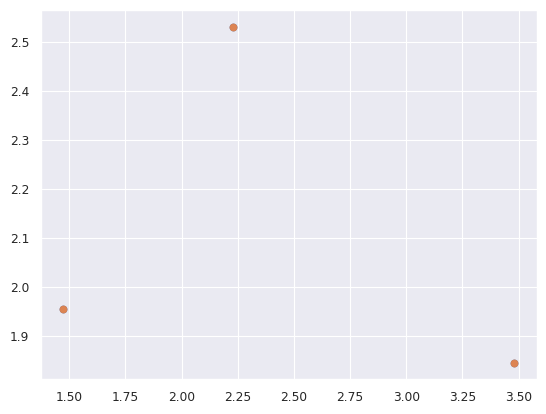

In [156]:
plt.scatter(df['r'],df['delta'])
plt.show()

In [64]:
print(repo(3,2))

15.383747480504146


In [28]:
X = dfInd["b"].values
bs = np.linspace(.95*np.min(X),1.05*np.max(X),50)
rs = np.linspace(.6,6,50)

array([ 5.38852468,  6.17465023,  6.94196194,  7.68209562,  8.38822843,
        9.05498456,  9.6783409 , 10.25553262, 10.78495885, 11.26608835,
       11.69936511, 12.08611402, 12.42844653, 12.72916625, 12.99167463,
       13.21987661, 13.41808624, 13.59093233, 13.74326413, 13.88005692,
       14.00631771, 14.12699083, 14.24686363, 14.37047208, 14.50200646,
       14.64521694, 14.80331932, 14.97890057, 15.17382456, 15.38913764,
       15.62497436, 15.88046303, 16.15363143, 16.44131243, 16.73904964,
       17.04100304, 17.33985465, 17.62671417, 17.8910246 , 18.12046792,
       18.30087072, 18.41610983, 18.44801801, 18.37628952, 18.17838586,
       17.82944134, 17.30216874, 16.56676501, 15.59081682, 14.3392063 ])

In [58]:
r, b = np.meshgrid(rs, bs)
#Z = (0.83926605*r+0.5963207731789426)*(-12.01*delta**4+106.7*delta**3-350.5*delta**2+502*delta - 258.5)
ZZ = (0.83926605*r+0.5963207731789426)*(13.58*b - 19.44*b + 3.229*b + 6.332)
ZZZ = (0.83926605*r+0.5963207731789426)*(-4.189*b + 7.062)
#ZM = (0.83926605*r+0.5963207731789426)*(20.37*delta**2 - 90.71*delta + 103.8)

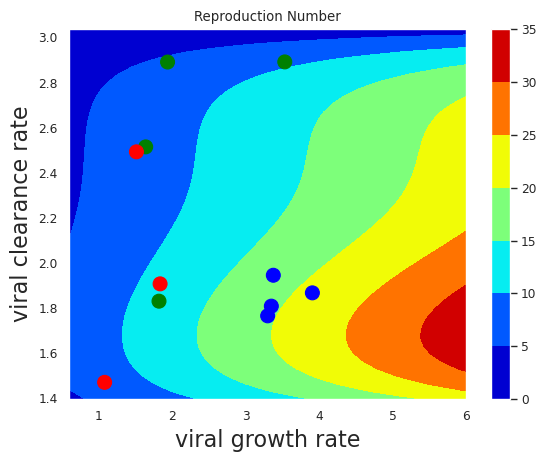

In [149]:
colors = ['blue','blue','blue','blue','green','green','green','green','red','red','red']
plt.contourf(r,delta,Z,cmap="jet")
plt.colorbar()
plt.xlabel('viral growth rate')
plt.ylabel('viral clearance rate')
plt.title('Reproduction Number')
Y = df["delta"].values
X = df["r"].values
h = plt.scatter(dfInd["r"], dfInd["delta"],color=colors,s=100)
plt.show()

In [34]:
colors = ['blue','blue','blue','blue','green','green','green','green','red','red','red']
plt.contourf(r,delta,ZZ,cmap="jet")
plt.colorbar()
plt.xlabel(r'viral growth rate [$r$]')
plt.ylabel(r'viral clearance rate [$\delta$]')
plt.title('Reproduction Number')
Y = df["delta"].values
X = df["r"].values
h = plt.scatter(dfInd["r"], dfInd["delta"],color=colors,s=100)
plt.show()

NameError: name 'delta' is not defined

In [33]:
colors = ['blue','green','red']
plt.contourf(r,delta,Z,cmap="jet")
plt.colorbar()
plt.xlabel('viral growth rate')
plt.ylabel('viral clearance rate')
plt.title('Reproduction Number')
Y = df["delta"].values
X = df["r"].values
h = plt.scatter(df["r"], df["delta"],color=colors,s=100)
plt.show()

NameError: name 'delta' is not defined

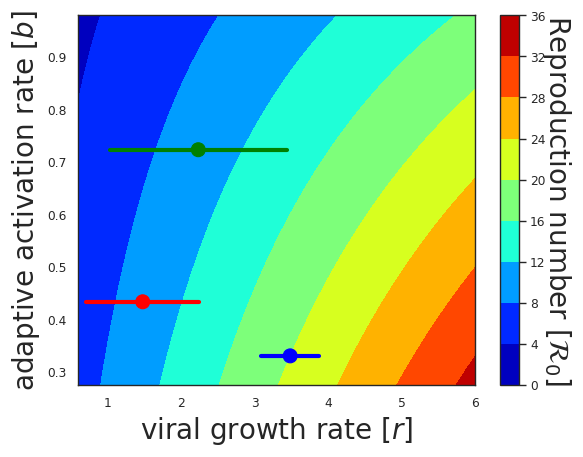

In [60]:
colors = ['blue','green','red']
plt.contourf(r,b,ZZZ,cmap="jet")
h = plt.colorbar()
h.set_label('Reproduction number [$\mathcal{R}_0$]', rotation=270,labelpad=20)
plt.xlabel(r'viral growth rate [$r$]')
plt.ylabel(r'adaptive activation rate [$b$]')
#plt.title('Reproduction Number')
Y = df["b"].values
X = df["r"].values
sns.lineplot(x=[ELB[0],EUB[0]],y=[Y[0],Y[0]],color='blue',linewidth=3)
sns.lineplot(x=[ELB[1],EUB[1]],y=[Y[1],Y[1]],color='green',linewidth=3)
sns.lineplot(x=[ELB[2],EUB[2]],y=[Y[2],Y[2]],color='red',linewidth=3)
h = plt.scatter(df["r"], df["b"],color=colors,s=100)
plt.show()

In [80]:
colors = ['blue','green','red']
plt.contourf(r,delta,ZZZ,cmap="jet")
plt.colorbar()
plt.xlabel('viral growth rate')
plt.ylabel('viral clearance rate')
plt.title('Reproduction Number')
Y = df["delta"].values
X = df["r"].values
sns.lineplot(x=[ELB[0],EUB[0]],y=[Y[0],Y[0]],color='blue',linewidth=3)
sns.lineplot(x=[ELB[1],EUB[1]],y=[Y[1],Y[1]],color='green',linewidth=3)
sns.lineplot(x=[ELB[2],EUB[2]],y=[Y[2],Y[2]],color='red',linewidth=3)
h = plt.scatter(df["r"], df["delta"],color=colors,s=100)
plt.show()
#SAT1 - 3.27-4.02
#SAT2 - 2.08-2.40
#SAT3

NameError: name 'delta' is not defined

In [79]:
colors = ['blue','green','red']
plt.contourf(r,delta,ZM,cmap="jet")
plt.colorbar()
plt.xlabel('viral growth rate')
plt.ylabel('viral clearance rate')
plt.title('Reproduction Number')
Y = df["delta"].values
X = df["r"].values
h = plt.scatter(df["r"], df["delta"],color=colors,s=100)
plt.show()

NameError: name 'delta' is not defined

In [39]:
df['R0Pop'] = df['infect period']*df['transmission']

In [40]:
def R0(r,b):
    return (0.83926605*r+0.5963207731789426)*(-4.189*b + 7.062)

In [6]:
df

,ID,k,K,delta,b,I0,r,P0,maxViral,TimeMax,cumViral,transmission,latent period,infect period,R0Pop
0,SAT1,0.114331,6.803884,1.846246,0.330213,2.621697,3.481154,0.008500,6.755854,3.689919,28.960281,3.57,0.63,5.76,20.5632
1,SAT2,0.155388,5.681303,2.531628,0.723336,2.393748,2.230398,0.010000,5.147607,4.583383,14.194865,2.33,1.38,4.71,10.9743
2,SAT3,0.067833,8.927389,1.956448,0.433351,2.810342,1.474534,0.014776,7.485831,6.239015,23.413533,1.92,3.03,4.30,8.2560


In [42]:
df['b']

0    0.330213
1    0.723336
2    0.433351
Name: b, dtype: float64

maxViral    21703
dtype: int64


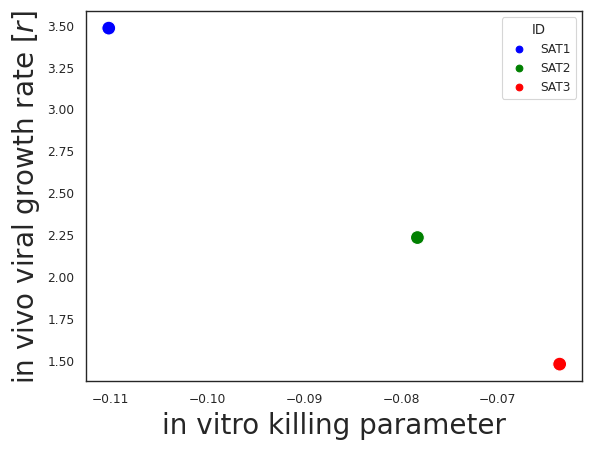

In [78]:
df['R0Immu'] =[R0(3.41154,0.330213), R0(2.230398,0.72336), R0(1.474534,0.433351)]
df['VitroKill'] = [-0.1102, -0.0783,-0.0636]

dfM = pd.read_csv(r'~/Documents/MATLAB/Model_identifiability/MeansHaptoOnlyDataTable.csv')
print(dfM[['maxViral']].idxmax())
dfM = dfM.drop(21703)

sns.scatterplot(data=df,x='VitroKill',y='r',palette=['blue','green','red'],hue='ID',s=100)
plt.xlabel(r'in vitro killing parameter')
plt.ylabel(r'in vivo viral growth rate [$r$]')
plt.show()

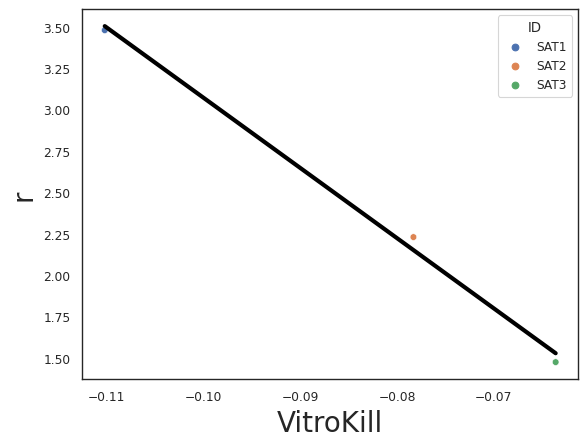

0.9953126613471541

In [66]:
X = df['VitroKill'].values
X = X.reshape(-1,1)
y = df['r'].values
reg = LinearRegression().fit(X, y)
xs = np.linspace(np.min(df['VitroKill']),np.max(df['VitroKill']),20)
xs = xs.reshape(-1,1)
plt.plot(xs, reg.predict(xs),color='black',linewidth=3)
sns.scatterplot(data=df,x='VitroKill',y='r',hue = 'ID')
plt.show()
r2_score(y, reg.predict(X))

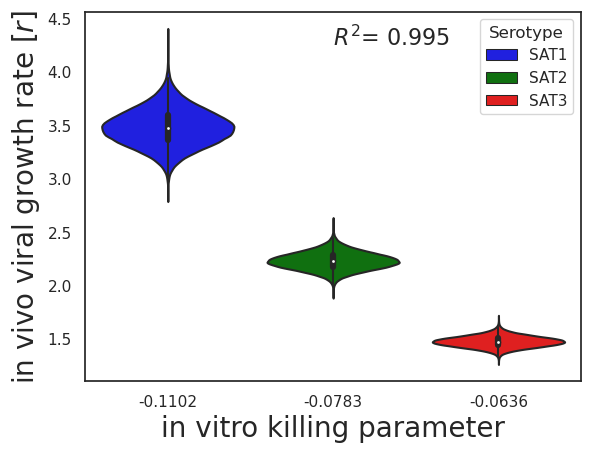

In [84]:
dfV = pd.read_csv(r'~/Documents/VivoVitro.csv')
h = sns.violinplot(data=dfV, x="VitroKill", y="r",hue="Serotype",palette=["blue","green","red"],dodge =False  )  
plt.xlabel(r'in vitro killing parameter', fontsize=20)
plt.ylabel(r'in vivo viral growth rate [$r$]',fontsize=20)
ys = reg.predict(X);
plt.text(1,4.25,'$R^2$= 0.995',fontsize=16)
plt.show()


In [53]:
x = np.array(df['R0Immu'])
y = np.array(df['b'])
x

array([19.6456527 ,  9.95147268,  9.62163212])

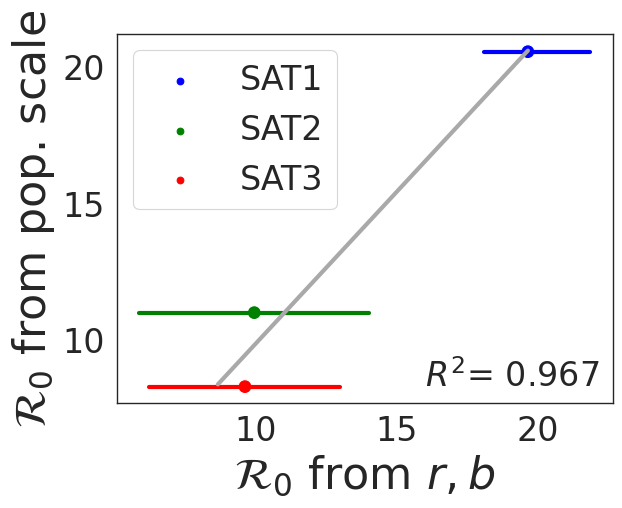

0.9669418478818228

In [54]:
yy=np.array(df['R0Pop'])
sns.lineplot(x=[R0(ELB[0],y[0]),R0(EUB[0],y[0])],y=[yy[0],yy[0]],color='blue',linewidth=3)
sns.lineplot(x=[R0(ELB[1],y[1]),R0(EUB[1],y[1])],y=[yy[1],yy[1]],color='green',linewidth=3)
sns.lineplot(x=[R0(ELB[2],y[2]),R0(EUB[2],y[2])],y=[yy[2],yy[2]],color='red',linewidth=3)
sns.scatterplot(data=df, x='R0Immu',y='R0Pop',palette=['blue','green','red'],hue='ID',s=100)
plt.xlabel(r'$\mathcal{R}_0$ from $r,b$',fontsize=32)
plt.ylabel(r'$\mathcal{R}_0$ from pop. scale', fontsize=32)
X = df['R0Immu'].values
X = X.reshape(-1,1)
y = df['R0Pop'].values
xs = np.linspace(.9*np.min(df['R0Immu']),np.max(df['R0Immu']),20)
xs = xs.reshape(-1,1)
reg = LinearRegression().fit(X, y)
plt.plot(xs, reg.predict(xs),color='darkgray',linewidth=3)
plt.text(16,8.25,'$R^2$= 0.967',fontsize=24)
plt.legend(fontsize=24)
plt.tick_params(axis="x", labelsize=24)
plt.tick_params(axis="y", labelsize=24)
plt.show()
r2_score(y, reg.predict(X))

In [84]:
R0(ELB[0],y[0])

-252.1378562969003

In [85]:
ELB[0]

3.0886272611726913